## Stock Market prediction

In [1]:
# Description : This program uses an artificial recurrent neural network called long short term memory (LSTM)
#              to predict the closing stock price of a corporation  using past 60days stock price.

In [2]:
# import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# Get the stock quote
df = pd.read_csv("stockmarketpredictdata.csv")
# show the data
df

,DATE,ABAN
0,2010-01-04,100.00
1,2010-01-05,100.00
2,2010-01-06,100.00
3,2010-01-07,100.00
4,2010-01-08,107.25
...,...,...
1896,2019-03-22,52.50
1897,2019-03-25,51.40
1898,2019-03-26,52.50
1899,2019-03-28,52.50


In [4]:
# Get the number of rows and columns in the dataset
df.shape

(1901, 2)

In [5]:
df['Submit_Date'] = pd.to_datetime(df['DATE'])

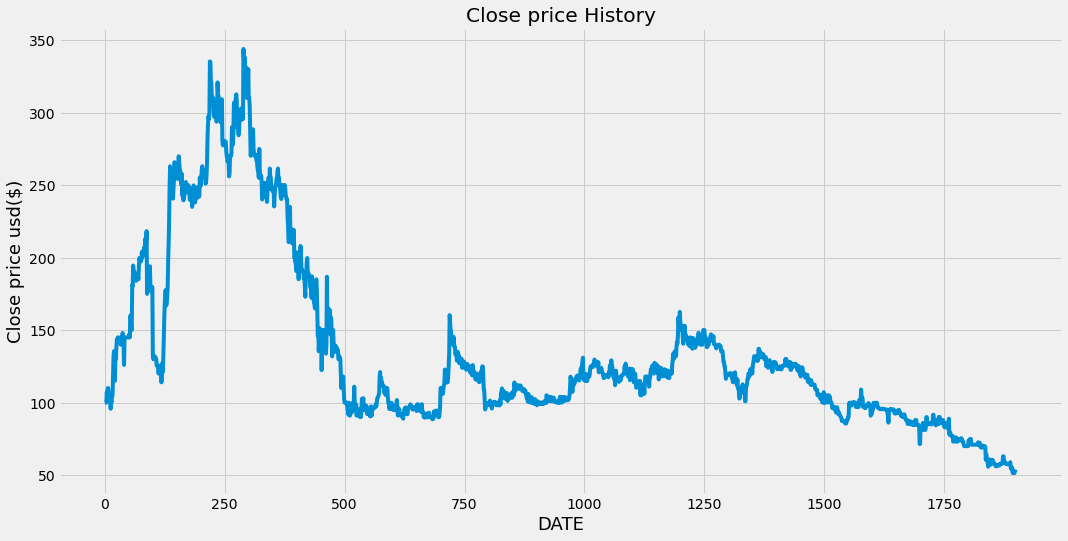

In [6]:
# Visualising the closing price
plt.figure(figsize=(16,8))
plt.title('Close price History')
plt.plot(df['ABAN'])
plt.xlabel('DATE', fontsize=18)
plt.ylabel('Close price usd($)', fontsize=18)
plt.show()

In [7]:
# create new data frame with only close colum
data = df.filter(['ABAN'])
# Convert the dataframe to numpy array
dataset = data.values
# Get the number of rows to train the model
# and round up 
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

1521

In [8]:
# Scale the data better for inputs to ml models
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.16615385],
       [0.16615385],
       [0.16615385],
       ...,
       [0.00376068],
       [0.00376068],
       [0.00205128]])

In [9]:
# Create the training data set
# Create the scaled dataset
train_data = scaled_data[0:training_data_len, :]
# Split the data into x_train and y_train
x_train = []
y_train = []
for i in range(60, len(train_data)):
    # get 0 to 59 row and colum 0
    x_train.append(train_data[i-60:i,0])
    # get 60 row and colum 0
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.16615385, 0.16615385, 0.16615385, 0.16615385, 0.19094017,
       0.18324786, 0.20034188, 0.20034188, 0.18324786, 0.17299145,
       0.17384615, 0.18324786, 0.15162393, 0.16957265, 0.16615385,
       0.18410256, 0.18324786, 0.22854701, 0.27470085, 0.28752137,
       0.25333333, 0.2174359 , 0.27897436, 0.26871795, 0.29606838,
       0.31487179, 0.31145299, 0.32      , 0.31487179, 0.31487179,
       0.31316239, 0.3165812 , 0.32      , 0.30290598, 0.30290598,
       0.3208547 , 0.31316239, 0.33025641, 0.32      , 0.30290598,
       0.25504274, 0.3191453 , 0.32      , 0.32      , 0.32      ,
       0.32      , 0.32      , 0.32      , 0.32      , 0.32      ,
       0.32      , 0.32683761, 0.32      , 0.37128205, 0.36786325,
       0.33709402, 0.33709402, 0.44307692, 0.44051282, 0.48923077])]
[0.47384615384615386]



In [10]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
x_train

array([[0.16615385, 0.16615385, 0.16615385, ..., 0.44307692, 0.44051282,
        0.48923077],
       [0.16615385, 0.16615385, 0.16615385, ..., 0.44051282, 0.48923077,
        0.47384615],
       [0.16615385, 0.16615385, 0.19094017, ..., 0.48923077, 0.47384615,
        0.47213675],
       ...,
       [0.23452991, 0.23452991, 0.22598291, ..., 0.16615385, 0.16273504,
        0.15316239],
       [0.23452991, 0.22598291, 0.23213675, ..., 0.16273504, 0.15316239,
        0.15316239],
       [0.22598291, 0.23213675, 0.22461538, ..., 0.15316239, 0.15316239,
        0.15589744]])

In [11]:
y_train

array([0.47384615, 0.47213675, 0.47384615, ..., 0.15316239, 0.15589744,
       0.15589744])

In [12]:
# reshape the data
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1461, 60, 1)

In [13]:
# Build the LSTM model 
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [14]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
# Train model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1461/1461 [==============================] - 25s 17ms/step - loss: 0.0023


In [16]:
# Create the testing dataset
#Create new array containing scaled values from index 1543 to 2003 
test_data = scaled_data[training_data_len -60:,:]
# Create teh data sets x_test and y_test
x_test = []
y_test =dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

In [17]:
# Convert data to numpy array 
x_test = np.array(x_test)
x_test.shape

(380, 60)

In [18]:
# Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(380, 60, 1)

In [19]:
# Get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [20]:
# Get the rooot mean squard error (RMSE)
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

7.943433536730315

<ipython-input-21-9afaab227966>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


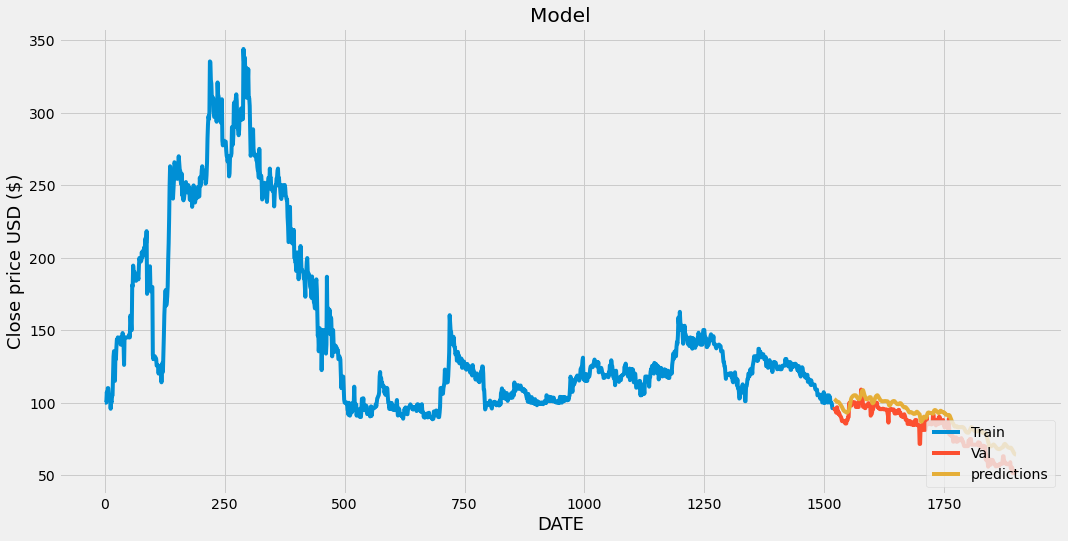

In [21]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('DATE', fontsize=18)
plt.ylabel('Close price USD ($)',fontsize=18)
plt.plot(train['ABAN'])
plt.plot(valid[['ABAN','Predictions']])
plt.legend(['Train', 'Val', 'predictions'], loc='lower right')
plt.show()

In [22]:
# Show the valid and predicted price
valid

,ABAN,Predictions
1521,97.0,102.484711
1522,95.1,102.231697
1523,95.1,101.853714
1524,95.0,101.482018
1525,93.1,101.162239
...,...,...
1896,52.5,65.115822
1897,51.4,64.750008
1898,52.5,64.398552
1899,52.5,64.250908


In [23]:
# Get the quote
ABAN_quote = pd.read_csv("ABAN.csv")
# Create new data frame 
new_df = ABAN_quote.filter(['ABAN'])
# Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
# Scale the data 
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty list 
X_test = []
# Append past 60 days
X_test.append(last_60_days_scaled)
# Convert the X test data set to numpy array
X_test = np.array(X_test)
# Reshape the data 1 is number of features
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
pred_price

array([[64.22057]], dtype=float32)